# 4. Training Classifier

In [350]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
#Try different classifier model
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [351]:

# Dataframe
path_df = "Data/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "Data/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "Data/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "Data/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "Data/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [352]:
print(features_train.shape)
print(features_test.shape)

(1891, 5000)
(334, 5000)


In [353]:
models = {1:'Logistic Regression',
          2:'Multinomial Naive Bayes', 
          3:'K Nearest Neighbour', 
          4:'Support Vector Machines', 
          5:'Random Forest'}

## Cross-Validation for Hyperparameter Tuning

In [354]:
# Pilihan jenis classifier. Untuk selain nomor 1, maka perlu penyesuaian di bagian Random Search dan Grid Search.

choice = 1

if choice == 1:
    classifier = LogisticRegression(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==2:
    classifier = MultinomialNB()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    print(classifier)
elif choice==3:
    classifier =KNeighborsClassifier()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==4:
    classifier =svm.SVC(random_state=8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==5:
    classifier = RandomForestClassifier(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())

Parameters currently in use in Logistic Regression:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 8,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


### Randomized Search Cross Validation

Cari parameter yang secara random menggunakan cross validation.

In [355]:
if choice == 1:
    # Create the random grid logistic regression
    random_grid = {'C': [float(x) for x in np.linspace(start = 0.1, stop = 1.9, num = 10)],
               'multi_class': ['multinomial'],
               'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
               'class_weight': ['balanced', None],
               'penalty': ['l2']}
elif choice==2:
    pass
elif choice==3:
    pass
elif choice==4:
    # Create the random grid SVM
    random_grid = {'C': [.0001, .001, .01],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': [.0001, .001, .01, .1, 1, 10, 100],
                  'degree': [1, 2, 3, 4, 5],
                  'probability': [True]
                 }
elif choice==5:
    # Create the random grid Random Forest
    random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [20, 40, 60, 80, 100, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }
    
pprint(random_grid)

{'C': [0.1,
       0.3,
       0.5,
       0.7,
       0.8999999999999999,
       1.0999999999999999,
       1.3,
       1.5,
       1.7,
       1.9],
 'class_weight': ['balanced', None],
 'multi_class': ['multinomial'],
 'penalty': ['l2'],
 'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']}


In [356]:
# Definition of the random search
random_search = RandomizedSearchCV(estimator=classifier,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  9.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=8,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=50, n_jobs=None,
                   param_distributions={'C': [0.1, 0.3, 0.5, 0.7,
                                              0.8999999999999999,
                                              1.0999999999999999, 1.3, 1.5, 1.7,
                                              1.9],
          

In [357]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'class_weight': 'balanced', 'C': 1.9}

The mean accuracy of a model with these hyperparameters is:
0.9793759915388683


### Grid Search Cross Validation

Kemudian lanjutkan pencarian yang lebih detil terhadap daerah nilai terbaik hasil random search di atas.

In [358]:

# Create the parameter grid based on the results of random search 
param_grid = {'C': [float(x) for x in np.linspace(start = 0.6, stop = 1.5, num = 10)],
               'multi_class': ['multinomial'],
               'solver': ['sag'],
               'class_weight': ['balanced']}

# Create a base model
classifier = LogisticRegression(random_state=8)

In [359]:
# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  4.3min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=8, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002,
                               1.3, 1.4, 1.5],
                         'class_weight': ['balanced'],
                         'multi_class': ['multinomial'], 'solver': ['sag']},
 

In [360]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'C': 1.3, 'class_weight': 'balanced', 'multi_class': 'multinomial', 'solver': 'sag'}

The mean accuracy of a model with these hyperparameters is:
0.9834666666666667


In [361]:
best_classifier = grid_search.best_estimator_

best_classifier

LogisticRegression(C=1.3, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

### Model fit and performance

In [362]:
best_classifier.fit(features_train, labels_train)

LogisticRegression(C=1.3, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

In [363]:
classifier_pred = best_classifier.predict(features_test)

In [364]:
d = {
     'Model': 'Logistic Regression',
     'Training Set Accuracy': accuracy_score(labels_train, best_classifier.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, classifier_pred)
}

df_models = pd.DataFrame(d, index=[0])
df_models

,Model,Training Set Accuracy,Test Set Accuracy
0,Logistic Regression,0.997356,0.982036


In [365]:
# Classification report
print("Classification report")
print(classification_report(labels_test,classifier_pred))

Classification report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        81
           1       0.98      0.98      0.98        49
           2       1.00      1.00      1.00        72
           3       0.99      1.00      0.99        72
           4       0.98      0.95      0.97        60

    accuracy                           0.98       334
   macro avg       0.98      0.98      0.98       334
weighted avg       0.98      0.98      0.98       334



### Confusion Matrix

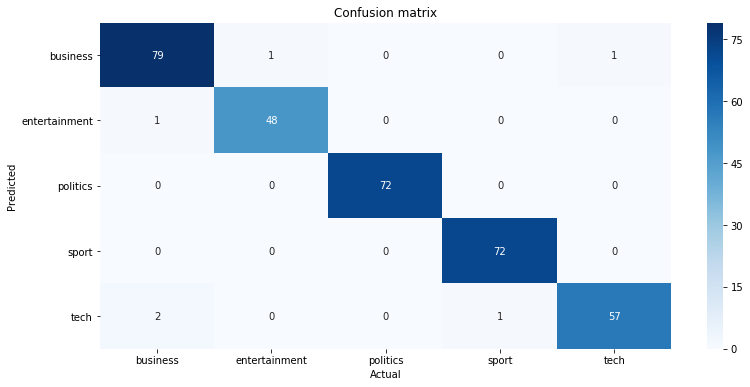

In [366]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

Bandingkan performansi dengan base model, yaitu model dengan parameter default.

In [367]:
base_model = LogisticRegression(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

C:\Users\frsluthfi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\frsluthfi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9760479041916168

In [368]:
best_classifier.fit(features_train, labels_train)
accuracy_score(labels_test, best_classifier.predict(features_test))

0.9820359281437125

# Latihan

1. Coba buatkan feature berikut, lalu laporkan pengaruhnya terhadap akurasi klasifikasi:
    a. Tanpa proses normalisation
    b. Tanpa proses lemmatisation
    c. Tanpa menghilangkan stopwords
2. Coba buat tfidf dengan nilai "max_features" yang berbeda-beda (lebih besar dan lebih kecil dari 300), lalu laporkan pengaruhnya terhadap akurasi klasifikasi.
3. Jika anda ingin menggunakan teks bahasa Indonesia, bagian mana saja yang perlu dilakukan penyesuaian?
4. Opsional: Gunakan word embedding (e.g word2vec, GloVe), Gunakan classifier yang berbeda-beda.


# Jawaban

Cukup tuliskan jawaban di sini :
1. a. Proses Normalisasi yang dihilangkan diantaranya: penghapusan karakter khusus '\r', '\n', '"', pengubahan ke bentuk lowercase, penghapusan sejumlah simbol, dan penghapusan apostrophe s.
Hasil akurasi tanpa proses Normalisasi dengan classifier Logistic Regression : 0.934132. Telah terjadi penurunan terhadap akurasi dengan menghilangkan proses normalisasi, khususnya terhadap model classifier Logistic Regression.
b. Tanpa dilakukan proses lemmatization, didapatkan akurasi yang sedikit lebih tinggi dibandingkan dengan menggunakan proses lemmatization. Akurasi yang didapatkan adalah 0.9461078
c. Dengan tidak menghilangkan stop-words, akurasi berkurang menjadi 0.931138. Angka tersebut bahkan sedikit lebih rendah dibandingkan dengan tidak melakukan proses normalisasi terlebih dahulu. Telah dilakukan pula eksekusi tanpa stop-words removal menggunakan classifier SVM, dimana akurasi dari hasil yang didapatkan sama persis dengan menggunakan classifier Logistric Regression namun membutuhkan waktu eksekusi yang lebih lama.
Berdasarkan hasil pengamatan akurasi terhadap penghilangan proses-proses text cleaning, penghapusan normalisasi dan penghilangan stop-words berpengaruh pada penurunan akurasi klasifikasi, sedangkan proses penghilangan proses lemmatization justru menambah akurasi. Semua penghilangan proses yang telah dilakukan bersifat toggle, dimana jika salah satu proses (dari poin a, b, dan c) dihapuskan maka proses yang lain tetap berjalan.

2. Telah dilakukan percobaan perubahan nilai "max_features" 100, 300, dan 500. Didapatkan hasil akurasi yang berbeda terhadap perubahan nilai tersebut.
Untuk max_features 100 menghasilkan akurasi paling kecil, yaitu 0.89221 dibandingkan dengan nilai max_features yang lainnya.
Untuk max_feautres 300 menghasilkan akurasi yang cupuk signifikan naik dibanding dengan 100, yaitu 0.94012. Namun, untuk max_features 500 menghasilkan akurasi yang tidak berbeda jauh dengan 300, yaitu 0.95808.
Selain itu, telah dilakukan pengubahan nilai max_features yang signifikan berbeda: 5000 features. Niai tersebut menghasilkan akurasi yang paling baik, dan berbeda cukup signifikan terhadap fitur di bawahnya (300, 500) dimana menghasilkan akurasi 0.982036.

3. Pada tahap cleaning, perlu dilakukan beberapa penyesuaian.
Pertama, tidka perlu melakukan penghapusan apostrophe s ('s) karena tidak terdapat notasi tersebut pada Bahasa Indonesia. 
Lalu, perlu dilakukan penyesuaian terhadap proses Lemmatization karena perbedaan karakteristik grammar Indonesia dengan Inggris. Contoh sederhana dalam Bahasa Indonesia tidak terdapat kata jamak yang ditambahkan 's'/'es' di belakangnya, dan pada Bahasa Inggris tidak terdapat kata berimbuhan seperti 'memakai'. 
Stop-Words perlu disesuaikan dimana secara bahasa tentunya berbeda antara Indonesia dengan Inggris. 